In [1]:
import pandas as pd
import numpy as np
import matplotlib #mandatory
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

Here, the "matplotlib.rcParams" It is a global configurationis used to set the default values of the matplotlib figures. figure.fisize gives a value to the tuple generated containing height and width.


In [2]:
df = pd.read_csv("heights_zscore.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


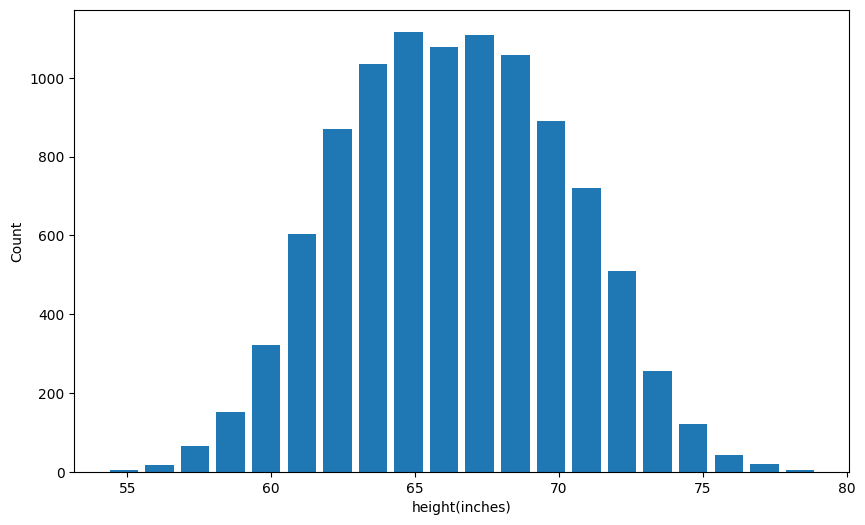

In [5]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel("height(inches)")
plt.ylabel("Count")
plt.show()


In [9]:
from scipy.stats import norm


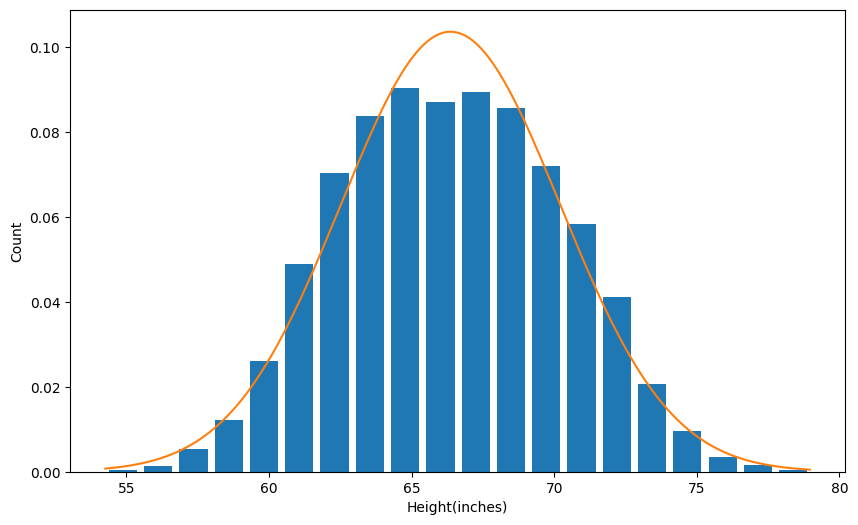

In [10]:
plt.hist(df.height, bins=20, rwidth = 0.8, density = True)
plt.xlabel("Height(inches)")
plt.ylabel("Count")

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [16]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [17]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [19]:
df[(df.height>upper_limit)| (df.height<lower_limit)]


,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [21]:
df[(df.height<upper_limit) & (df.height>lower_limit)]

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


An alternative is using z-score

In [27]:
df['zscore'] = (df['height'] - df['height'].mean())/df['height'].std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [29]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [31]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [35]:
df[(df['zscore']<-3) | (df['zscore']>3) ]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [36]:
df_no_outliers = df[(df['zscore']>-3) & (df['zscore']<3)]
df_no_outliers

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [37]:
df.shape[0] - df_no_outliers.shape[0]

7